# Changing $n$ and $p$

The binomial has two parameters, $n$ and $p$, which together determine the probability of obtaining $k$ hits:

$$ k \sim \mathcal{B}(n,p) $$

What happens to the frequency of each value of k, if we change the probability of a hit $p$, or the number of trials $n$?

## $p$, probability of a hit

First we investigate what happens to our simulated distribution of $k$ if we change the probability of a hit on any given trial to be $p=0.7$ (ie the coin is biased to produce heads 70% of the time)

### Set up Python libraries

As usual, run the code cell below to import the relevant Python libraries

In [1]:
# Set-up Python libraries - you need to run this but you don't need to change it
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas 
import seaborn as sns
sns.set_theme() # use pretty defaults

### Simulation

Here is the code for the simulation again, now with $n$ and $p$ coded as variables rather than <i>hard coded</i> as 10 and 0.5

<ul>
    <li> Can you modify it so that p=0.7?
</ul>

<Axes: ylabel='count'>

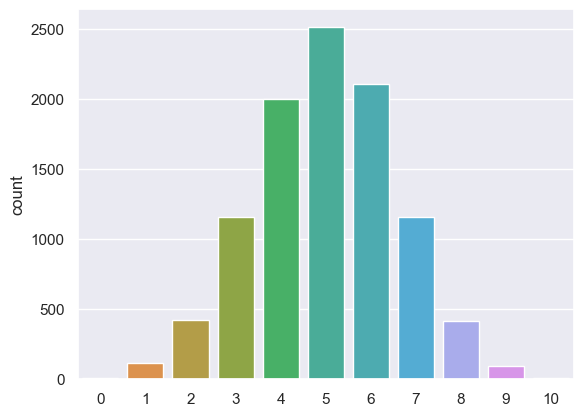

In [2]:
n=10
p=0.5
nReps = 10000
k = np.empty(nReps)

for i in np.arange(len(k)): # we are going to simlulte 10,000 repeats of 10 coin tosses
    k[i] = np.random.binomial(n,p)
    
sns.countplot(x=k, order=range(n+1)) 

You should notice after modifying the simulation so that $p=0.7$ that the most common value for k is 7, ie 7/10 hits.

Try some other values of p.

## Mean of $k$

The <i>expected value</i> of $k$, ie the mean of $k$ over many repetitions, is given by

$$ E(k) = np $$

This can be seen by playing around with the values of $p$ (and indeed $n$) in the following code:

In [3]:
n=10
p=0.7
nReps = 10000
k = np.empty(nReps)

for i in np.arange(len(k)): # we are going to simlulte 10,000 repeats of 10 coin tosses
    k[i] = np.random.binomial(n,p)
    
print('mean(k) = ' + str(k.mean()))
print('np = ' + str(n*p))

mean(k) = 7.0059
np = 7.0


## $n$, number of trials

If we increase the number of trials to 100, what happens to the frequency distribution of $k$?

Here we modify the simulation so that $n=100$:

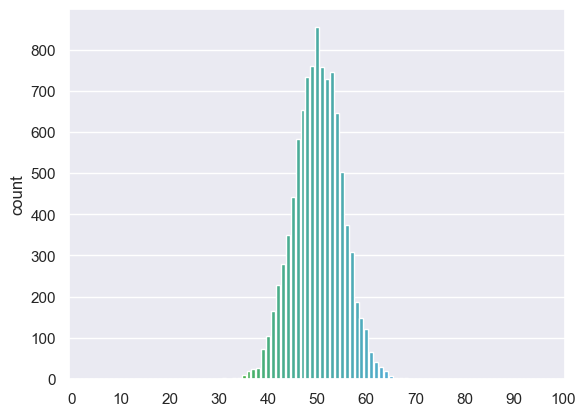

In [4]:
n=100
p=0.5
nReps = 10000
k = np.empty(nReps)

for i in np.arange(len(k)): # we are going to simlulte 10,000 repeats of 10 coin tosses
    k[i] = np.random.binomial(n,p)
    
sns.countplot(x=k, order=range(n+1)) 
plt.xticks(range(0, n+1, 10));

We can see that the peak of the histogram is where we expect (the most common value of $k$ is 50, $np$) but the spread of the histogram is narrower, compared to the range of possible values for $k$ (0 to $n$) than when $n$ was lower

## Standard deviation of $k$

The standard deviation of $k$ (or its expected standard deviation over many repetitions of 10 coin tosses) is given by

$$ std(k) = \sqrt{npq} $$

... where $q = (1-p)$

This can be seen by playing around with $n$ (and indeed $p$) in the following code block:

In [5]:
n=100
p=0.5
nReps = 10000
k = np.empty(nReps)

for i in np.arange(len(k)): # we are going to simlulte 10,000 repeats of 10 coin tosses
    k[i] = np.random.binomial(n,p)
    
print('std(k) = ' + str(k.std()))
print('sqrt(npq) = ' + str((n*p*(1-p))**0.5))

std(k) = 4.9753908298745735
sqrt(npq) = 5.0


## Standard deviation of $k/n$

We noted above that that spread of the distribution of $k$, as a proportion of the range of possible values $(0:n)$ decreased as $n$ increased, in other words that the chance of getting a high or low proportion of hits due to chance decreases when $n$ is high (this was discussed in the lecture)

The proportion of hits is $k/n$ and its standard deviation is given by

$$ \frac{\sqrt{pq}}{\sqrt{n}} $$

where $ q = (1-p) $

This has the interesting consequence that <b>for a given value of p, the standard deviation fo the proportion of hits is proprtional to $\frac{1}{\sqrt(n)}$ </b>

In other words, as $n$ increases, the proportion of hits I get in a single 'repetition' of the experiment (a single set of 10 coin tosses in our example) conforms more closely to the true value of $p$, the probability of a hit - 

in other words, my estimate of $p$ gets better

but only in proportion to $\sqrt{n}$ 